In [1]:
#Import everything
import Main.test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Helpers.regression_helpers import *

2024-11-16 14:40:46.193014: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-16 14:40:46.196966: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-16 14:40:46.209354: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-16 14:40:46.229587: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-16 14:40:46.235661: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-16 14:40:46.250828: I tensorflow/core/platform/cpu_feature_gu

# Baseline Visualization

In [2]:
baselines_cross = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineData.csv")
baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataOnSample.csv")
baselines.sample(5)

,csv_file,split,KNN,A_Classification_Score,B_Classification_Score
261,OpticalNetwork,distort,15,0.818208,0.809248
37,ComputerHardware,random,37,0.471737,0.600590
267,OpticalNetwork,distort,93,0.539492,0.537050
524,Parkinsons,skewed,474,0.283822,0.623939
79,Hydrodynamics,skewed,65,-0.002059,0.633488


In [3]:
baselines_grouped = baselines.groupby(by = ["csv_file", "split"]).max().drop(columns = ["KNN"]).reset_index()
baselines_grouped[baselines_grouped["csv_file"] == "Hydrodynamics"]

,csv_file,split,A_Classification_Score,B_Classification_Score
45,Hydrodynamics,distort,0.944973,0.895982
46,Hydrodynamics,even,0.000619,0.988501
47,Hydrodynamics,random,-0.002573,0.940687
48,Hydrodynamics,skewed,-0.000754,0.983942
49,Hydrodynamics,turn,0.944973,0.944830


<Axes: xlabel='csv_file'>

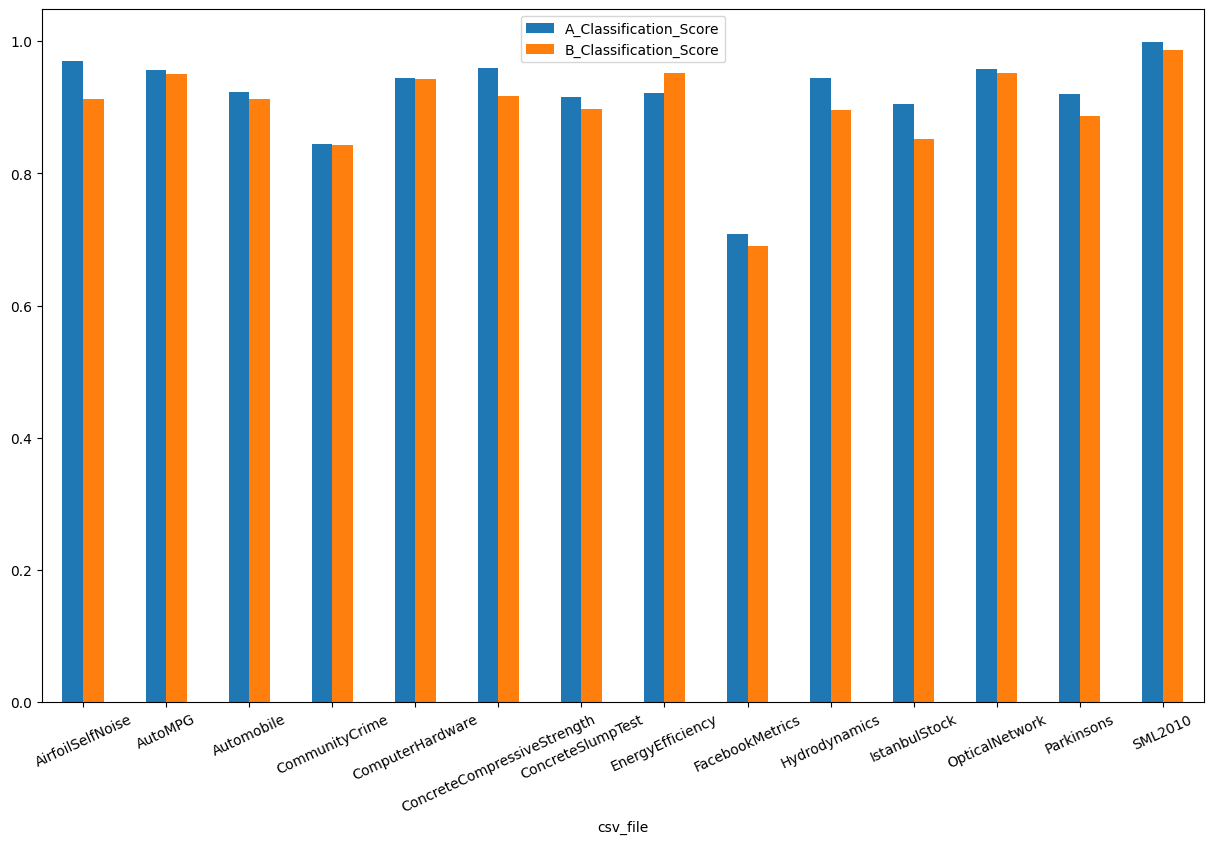

In [4]:
baselines_grouped[baselines_grouped["split"] == "distort"].set_index("csv_file").plot(kind = "bar", subplots=False, figsize=(15,9), rot= 25)
#Keep in mind that these are trained on one domain, then tested on the other. 

# Model Comparison

In [5]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")
reg_df.sample(5)


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Parameter STD
25,RF-SPUD,Hydrodynamics,skewed,0.3,"{'knn': 2, 'OD_method': 'default', 'agg_method...",{'42': -0.007624224815255376},{'42': 3.1624219935908245e-05},{'42': 0.15032579504462762},{'42': -0.6910546563678623},{'42': -0.20272898607088985},{'42': 0.8817816933536555},{'42': 1.0455769767428453},{}
0,RF-SPUD,Hydrodynamics,random,0.3,"{'knn': 23, 'OD_method': 'default', 'agg_metho...","{'42': -0.10417579150570377, '1738': -0.342362...","{'42': 0.11581843481194129, '1738': 0.49837662...","{'42': -0.09665723778664015, '1738': -0.191688...","{'42': -0.5306687440003683, '1738': -0.2033593...","{'42': -0.17485638750343568, '1738': -0.041352...","{'42': 0.8715043929202368, '1738': 1.111282177...","{'42': 0.9947588151817007, '1738': 1.194601978...",{}
34,JLMA,Hydrodynamics,random,0.3,"{'knn': 2, 'normalized_laplacian': True, 'd': ...","{'42': -0.3237856557499381, '1738': -0.1135529...","{'42': 0.5158068392646314, '1738': 0.519253879...","{'42': -0.49659967137632965, '1738': -0.270350...","{'42': -1.0738964747677446, '1738': -0.2385525...","{'42': -0.20007347611477844, '1738': -0.080624...","{'42': 0.8808077108448419, '1738': 1.132042871...","{'42': 1.157899125812811, '1738': 1.2119446236...",{}
16,MASH,Hydrodynamics,distort,0.3,"{'knn': 65, 'page_rank': 'off-diagonal', 'DTM'...","{'42': 0.6429294094517624, '1738': 0.653678524...","{'42': 0.011416343396862878, '1738': 0.0114163...","{'42': 0.700173149507487, '1738': 0.6701448081...","{'42': 0.5721610747210417, '1738': 0.598616460...","{'42': 0.20227954204399823, '1738': 0.39819429...","{'42': 0.7181291475548848, '1738': 0.844799615...","{'42': 0.5259171541447853, '1738': 0.689930488...","{'connection_limit': 0.0, 'threshold': 0.0, 'e..."
9,MAPA,Hydrodynamics,random,0.3,"{'knn': 9, 'r': 100}","{'42': -0.08379478304470656, '1738': -0.252595...","{'42': 0.354240625, '1738': 0.380371875, '5271...","{'42': 0.016676888951284385, '1738': 0.0035576...","{'42': 0.002646309254298096, '1738': 0.0103377...","{'42': 0.0066336996219327204, '1738': -0.08562...","{'42': 1.0894826667398432, '1738': 0.977715011...","{'42': 1.0916670784718632, '1738': 0.933501727...",{}


In [6]:
proc_reg_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])

#Average out the random seeds
for columns in ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb", "Nearest Neighbor", "Nearest Neighbor (F1 score or RMSE)", "Random Forest (F1 score or RMSE)"]:
    proc_reg_df[columns] = [np.mean(list(d.values())) for d in proc_reg_df[columns].values]

proc_reg_df["Combined_Metric"] = proc_reg_df["CE"] - proc_reg_df["FOSCTTM"]
proc_reg_df = proc_reg_df.merge(baselines_grouped, how = "left")

In [7]:
proc_reg_df.sample(3)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score
31,MASH-,Hydrodynamics,distort,0.3,0.618801,0.015405,0.624994,0.650480,0.324291,0.760358,0.548193,0.603396,0.944973,0.895982
2,DTA,Hydrodynamics,skewed,0.3,0.073578,0.405050,0.258471,0.234361,0.191540,0.982868,0.956484,-0.331472,-0.000754,0.983942
24,MALI-RF,Hydrodynamics,random,0.3,-0.173085,0.422801,-0.057898,-0.077924,-0.032514,0.943630,0.963766,-0.595886,-0.002573,0.940687


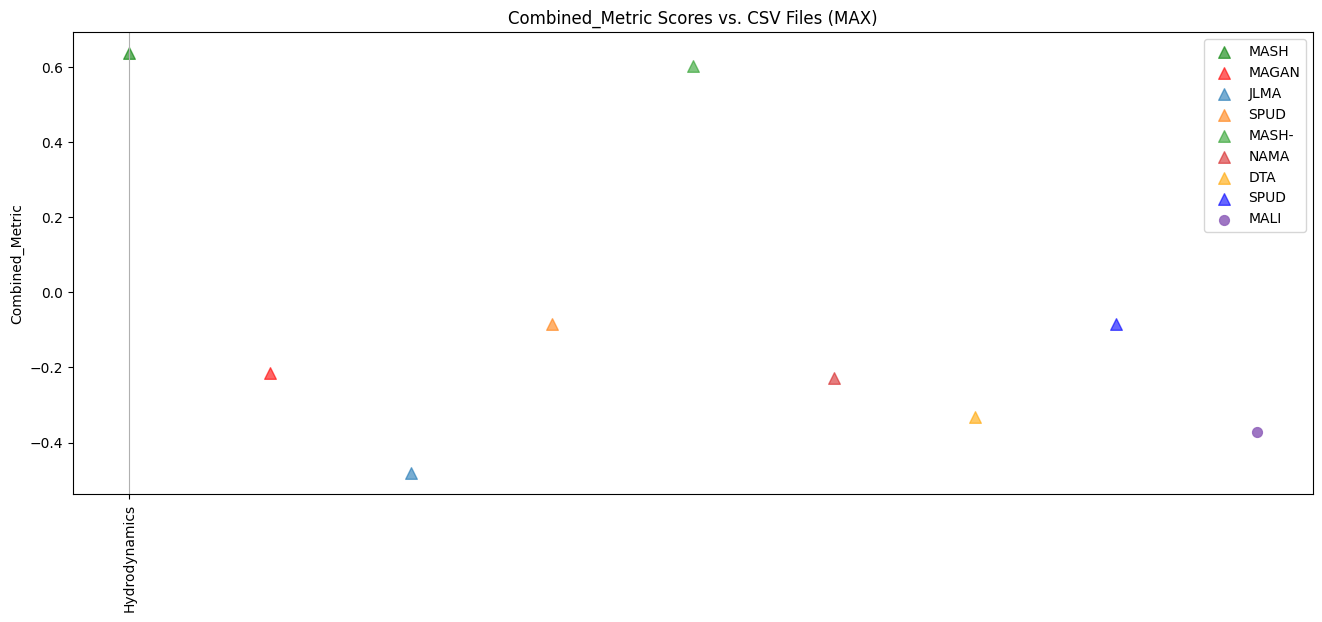

In [ ]:
plt_methods_by_CSV_max[row, col][row, col](df = proc_reg_df, plot_methods=["MASH", "NAMA", "MALI", "SPUD", "MASH-", "BL_A-B", "BL_B-A", "MAGAN", "JLMA", "DTA"])

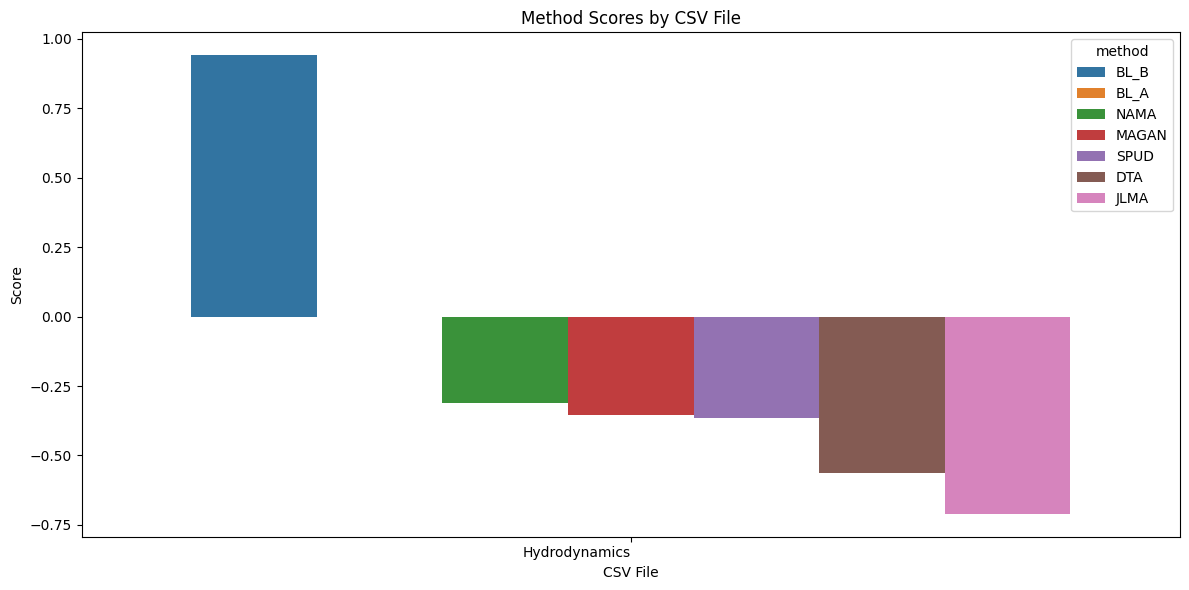

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = plt_methods_by_CSV_max(df = subset_df(proc_reg_df, split = "random"), return_df=True)

# Step 1: Melt the DataFrame into a long format
df_melted = pd.melt(df[['csv_file', "MASH", "NAMA", "SPUD", "MASH-", "BL_A", "BL_B",  "MAGAN", "JLMA", "DTA"]], id_vars='csv_file', var_name='method', value_name='score')

# Step 2: Drop rows with NaN values in the 'score' column
df_melted = df_melted.dropna(subset=['score'])

# Step 3: Sort by csv_file and score, with highest score first
df_sorted = df_melted.sort_values(['csv_file', 'score'], ascending=[True, False])

#Lets avoid negative values
df_sorted["score"] = df_sorted["score"] #+ 1

# Step 4: Plot using seaborn or matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x='csv_file', y='score', hue='method', data=df_sorted)

# Step 5: Adjust the plot aesthetics
plt.title('Method Scores by CSV File')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for readability
plt.ylabel('Score')
plt.xlabel('CSV File')
plt.tight_layout()

# Show the plot
plt.show()


In [32]:
16 //4, 16%4

(4, 0)

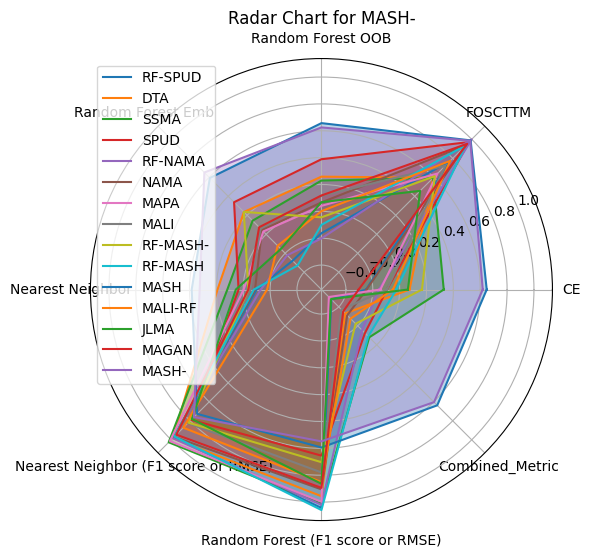

In [ ]:

# Radar Chart: Scores per Method
from math import pi
fig, ax = plt.subplots(rows = 4, columns = 4, figsize=(6, 6), subplot_kw=dict(polar=True))


for method_name, i in enumerate(proc_reg_df["method"].unique()):
    row = i //4
    col = i % 4
    
    method_data = proc_reg_df[proc_reg_df["method"] == method_name].iloc[0, 4:-2]  # Select scores
    method_data["FOSCTTM"] = 1 - method_data["FOSCTTM"]
    categories = list(method_data.index)
    values = method_data.values.flatten().tolist()
    values += values[:1]  # Repeat the first value to close the radar chart

    # Angle for each category
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    # Plot
    ax[row, col].plot(angles, values, label=method_name)
    ax[row, col].fill(angles, values, alpha=0.3)
    ax[row, col].set_xticks(angles[:-1])
    ax[row, col].set_xticklabels(categories)
    ax[row, col].set_title(f"Radar Chart for {method_name}")
    plt.legend()

# Veiw Feature variance

In [10]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")

#Average out the random seeds
reg_df["CE"] = [np.mean(list(d.values())) for d in reg_df["CE"].values]
reg_df["FOSCTTM"] = [np.mean(list(d.values())) for d in reg_df["FOSCTTM"].values]
reg_df["Combined_Metric"] = reg_df["CE"] - reg_df["FOSCTTM"]
reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Parameter STD,Combined_Metric
25,RF-SPUD,Hydrodynamics,skewed,0.3,"{'knn': 2, 'OD_method': 'default', 'agg_method...",-0.007624,0.000032,{'42': 0.15032579504462762},{'42': -0.6910546563678623},{'42': -0.20272898607088985},{'42': 0.8817816933536555},{'42': 1.0455769767428453},{},-0.007656
26,DTA,Hydrodynamics,random,0.3,"{'knn': 37, 'distances': 'Not_DPT'}",-0.234365,0.327349,"{'42': 0.14138527682248558, '1738': 0.16869232...","{'42': 0.12098953998845197, '1738': 0.09900444...","{'42': 0.021221938511187588, '1738': 0.0618657...","{'42': 1.0814531926344717, '1738': 0.908874916...","{'42': 1.024855498286929, '1738': 0.8907030845...",{},-0.561714


### Spud Parameters on STD

In [11]:
spud_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "SPUD"]["Parameter STD"].values))
spud_param_df

,knn,OD_method,agg_method
0,0.126777,0.044320,0.150517
1,0.164238,0.070185,0.164293
2,0.163016,0.201067,0.020305
3,0.125185,0.057855,0.059305
4,0.187728,0.093017,0.121048
5,0.107144,0.104199,0.059967


<Axes: >

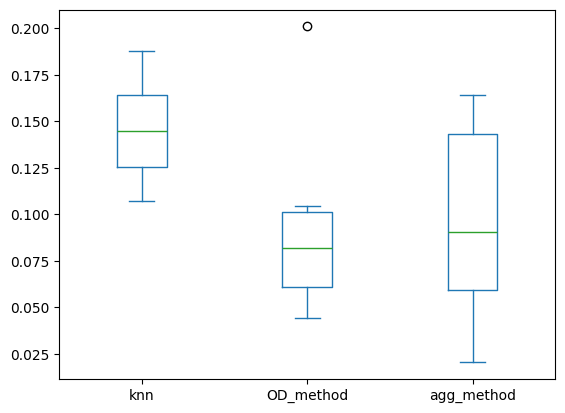

In [12]:
spud_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

## MASH Parameters on STD

In [13]:
mash_minus_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH-"]["Parameter STD"].values))
mash_minus_param_df

,knn,page_rank,DTM,density_normalization
0,0.241471,0.006065,0.067738,0.0


<Axes: >

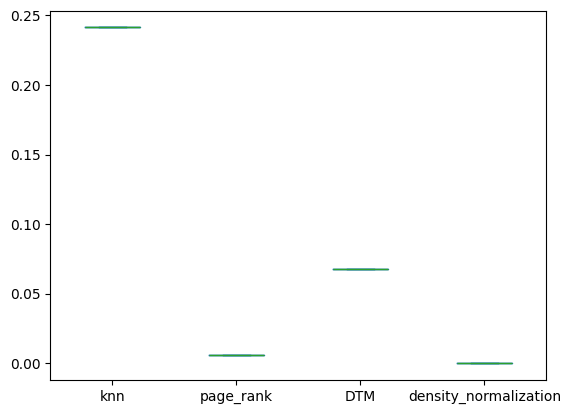

In [14]:
mash_minus_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

In [15]:
mash_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH"]["Parameter STD"].values))
mash_param_df

,connection_limit,threshold,epochs
0,0.0,0.0,0.0


<Axes: >

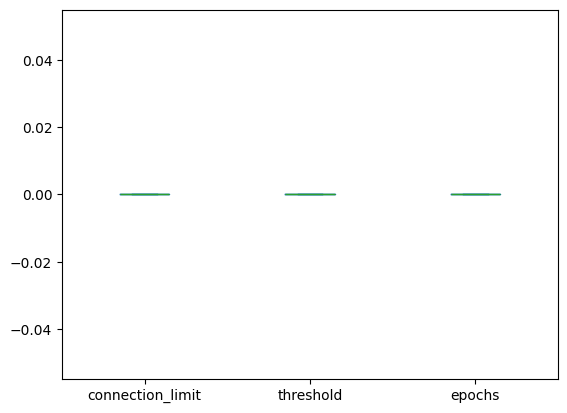

In [16]:
mash_param_df.plot(kind = "box") 